# 2025 데이터 크리에이터 캠프

@PHASE: Mission 3

@TEAM: 최후의 인공지능

## 1. Check GPU Availability

- GPU 번호 지정

In [1]:
!nvidia-smi

Tue Oct 14 14:16:00 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.216.03             Driver Version: 535.216.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100 80GB PCIe          On  | 00000000:17:00.0 Off |                    0 |
| N/A   60C    P0              80W / 300W |      0MiB / 81920MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [2]:
# Set CUDA Device Number
DEVICE_NUM = 0

from os import environ
environ["CUDA_VISIBLE_DEVICES"] = str(DEVICE_NUM)

## 2. Define Dataset

- 데이터셋 정의

### 2.1. tif 파일 시각화

shape: (512, 512) dtype: uint16 min: 1169 max: 7064


/usr/local/lib/python3.8/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


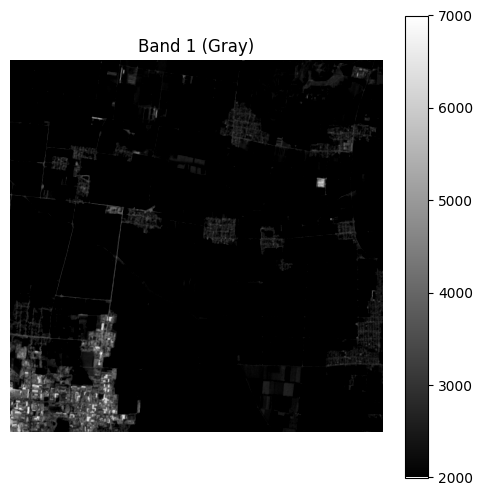

In [3]:
import rasterio
import matplotlib.pyplot as plt

# tif 파일 열기
with rasterio.open("./dataset/train_SN/images/SN10_CHN_00001_230409.tif") as src:
    img = src.read(2)   # 첫 번째 밴드 읽기 (shape: H x W)

print("shape:", img.shape, "dtype:", img.dtype, "min:", img.min(), "max:", img.max())

# 시각화
plt.figure(figsize=(6,6))
plt.imshow(img, cmap="gray", vmin=2000, vmax=7000)  # 값 범위 조정
plt.colorbar()
plt.title("Band 1 (Gray)")
plt.axis("off")
plt.show()

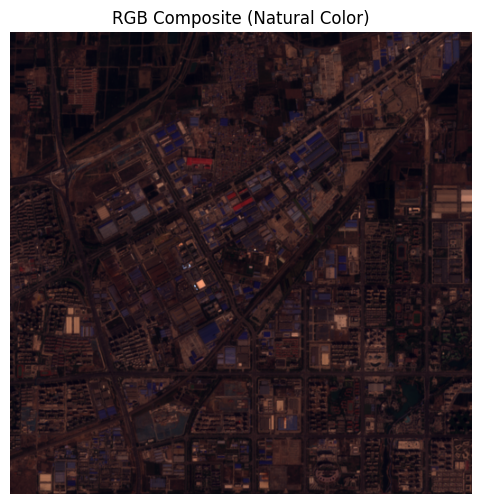

In [4]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

with rasterio.open("./dataset/train_SN/images/SN10_CHN_00004_230409.tif") as src:
    r = src.read(1).astype(float)
    g = src.read(2).astype(float)
    b = src.read(3).astype(float)

# 0~1로 정규화 함수
def normalize(arr):
    return (arr - arr.min()) / (arr.max() - arr.min())

rgb = np.dstack((normalize(r), normalize(g), normalize(b)))

plt.figure(figsize=(6,6))
plt.imshow(rgb)
plt.title("RGB Composite (Natural Color)")
plt.axis("off")
plt.show()

shape: (512, 512) dtype: int8 min: 10 max: 90


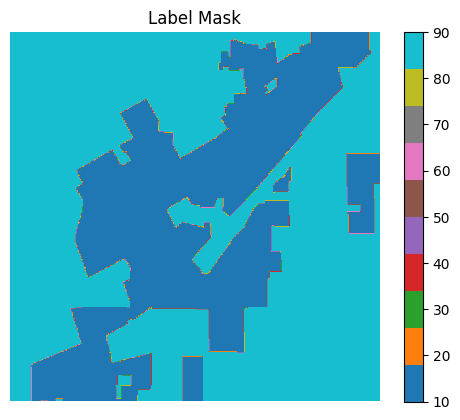

In [5]:
import matplotlib.pyplot as plt
import rasterio

with rasterio.open("./dataset/train_SN/labels/SN10_CHN_00004_230409.tif") as src:
    label = src.read(1)

print("shape:", label.shape, "dtype:", label.dtype, "min:", label.min(), "max:", label.max())

plt.imshow(label, cmap="tab10")   # 범주형 데이터는 tab20, tab10 추천
plt.colorbar()
plt.title("Label Mask")
plt.axis("off")
plt.show()

In [6]:
import rasterio
import numpy as np

# 라벨 tif 파일 경로
label_path = "./dataset/train_SN/labels/SN10_CHN_00015_230409.tif"

with rasterio.open(label_path) as src:
    label = src.read(1)  # 단일 밴드

print("라벨 shape:", label.shape)
print("dtype:", label.dtype)

# 고유한 클래스 값 확인
unique_values = np.unique(label)
print("라벨에 존재하는 클래스 값:", unique_values)

# 각 클래스 픽셀 개수 확인
for val in unique_values:
    count = np.sum(label == val)
    print(f"클래스 {val}: {count} 픽셀")


라벨 shape: (512, 512)
dtype: int8
라벨에 존재하는 클래스 값: [10 90]
클래스 10: 22210 픽셀
클래스 90: 239934 픽셀


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/

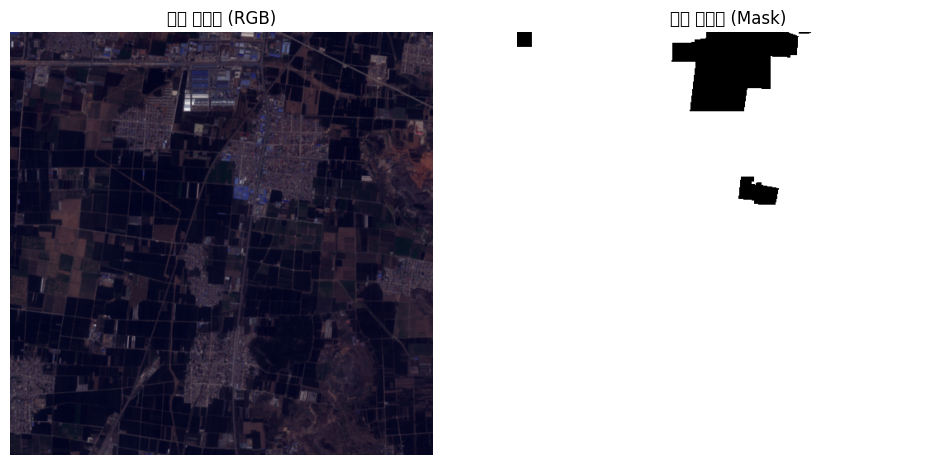

In [7]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# 원본 이미지 (RGB 합성)
with rasterio.open("./dataset/train_SN/images/SN10_CHN_00018_230409.tif") as src:
    r = src.read(1)
    g = src.read(2)
    b = src.read(3)

def normalize(arr):
    return (arr - arr.min()) / (arr.max() - arr.min())

rgb = np.dstack((normalize(r), normalize(g), normalize(b)))

# 라벨 이미지
with rasterio.open("./dataset/train_SN/labels/SN10_CHN_00018_230409.tif") as src:
    label = src.read(1)

# 시각화 (원본 + 라벨 나란히)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

mask = (label == 90).astype(np.uint8)  # 90인 부분만 1, 나머지는 0

# 원본
axes[0].imshow(rgb)
axes[0].set_title("원본 데이터 (RGB)")
axes[0].axis("off")

# 라벨
axes[1].imshow(mask, cmap="gray")
axes[1].set_title("라벨 데이터 (Mask)")
axes[1].axis("off")

plt.show()

NDVI 계산 완료!
NDVI 값 범위: -0.114 ~ 0.662


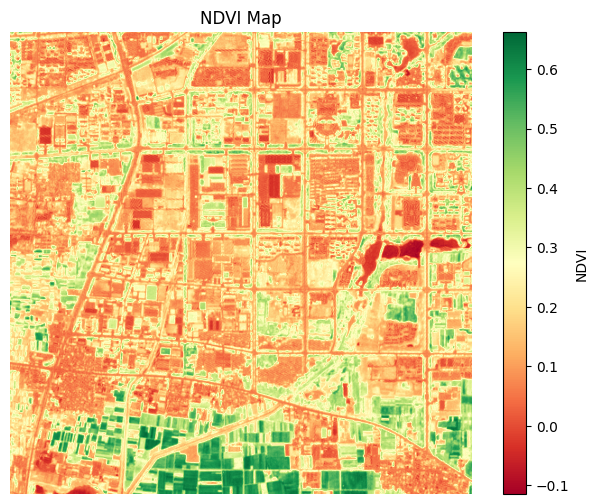

In [8]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

file_name = "./dataset/train_SN/images/SN10_CHN_00003_230409.tif"

with rasterio.open(file_name) as src:
    # 밴드 불러오기 (실제 데이터에 맞게 수정 필요!)
    # 보통 Band 4 = NIR, Band 3 = Red
    nir = src.read(4).astype(float)
    red = src.read(1).astype(float)

# NDVI 계산
denominator = nir + red
ndvi = np.where(denominator > 0, (nir - red) / denominator, 0)

print("NDVI 계산 완료!")
print(f"NDVI 값 범위: {ndvi.min():.3f} ~ {ndvi.max():.3f}")

# NDVI 시각화
plt.figure(figsize=(8,6))
plt.imshow(ndvi, cmap='RdYlGn')  # 빨강=낮음(식생 없음), 초록=높음(식생 풍부)
plt.colorbar(label="NDVI")
plt.title("NDVI Map")
plt.axis("off")
plt.show()

라벨 shape: (512, 512)
라벨 고유값: [10 90]


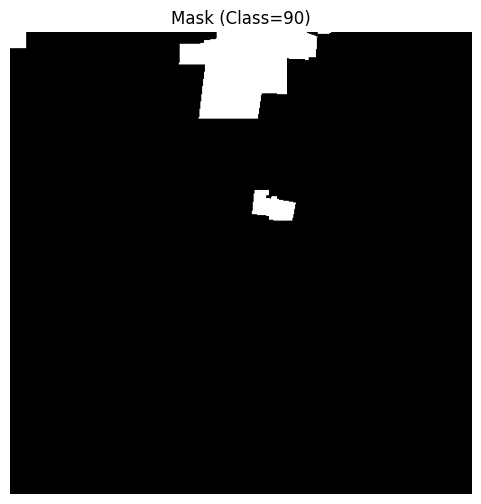

In [9]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# 라벨 tif 파일 경로
label_path = "./dataset/train_SN/labels/SN10_CHN_00018_230409.tif"

# 라벨 불러오기 (단일 밴드)
with rasterio.open(label_path) as src:
    label = src.read(1)

print("라벨 shape:", label.shape)
print("라벨 고유값:", np.unique(label))

# 특정 클래스(예: 90)만 마스크로 만들기
mask = (label != 90).astype(np.uint8)  # 90인 부분만 1, 나머지는 0

# 시각화
plt.figure(figsize=(6,6))
plt.imshow(mask, cmap="gray")
plt.title("Mask (Class=90)")
plt.axis("off")
plt.show()

### 2.2. 메타데이터 확인

In [10]:
import rasterio

tif_path = "./dataset/train_SN/labels/SN10_CHN_00003_230409.tif"

with rasterio.open(tif_path) as src:
    # 전체 메타데이터 (딕셔너리 형태)
    meta = src.meta
    print("메타데이터 전체:", meta)

    # 주요 정보 출력
    print("드라이버:", src.driver)       # GTiff 등
    print("밴드 수:", src.count)         # 몇 개의 밴드인지
    print("크기:", src.width, "x", src.height)
    print("dtype:", src.dtypes[0])       # 데이터 타입
    print("좌표계 (CRS):", src.crs)      # 좌표계
    print("Affine 변환(GeoTransform):", src.transform)

메타데이터 전체: {'driver': 'GTiff', 'dtype': 'int8', 'nodata': -128.0, 'width': 512, 'height': 512, 'count': 1, 'crs': CRS.from_epsg(32650), 'transform': Affine(10.0, 0.0, 467820.0000000041,
       0.0, -10.0, 3919920.0000000065)}
드라이버: GTiff
밴드 수: 1
크기: 512 x 512
dtype: int8
좌표계 (CRS): EPSG:32650
Affine 변환(GeoTransform): | 10.00, 0.00, 467820.00|
| 0.00,-10.00, 3919920.00|
| 0.00, 0.00, 1.00|


In [11]:
import rasterio

tif_path = "./dataset/train_SN/images/SN10_CHN_00003_230409.tif"

with rasterio.open(tif_path) as src:
    # 전체 메타데이터 (딕셔너리 형태)
    meta = src.meta
    print("메타데이터 :", meta)

    # 주요 정보 출력
    print("드라이버:", src.driver)       # GTiff 등
    print("밴드 수:", src.count)         # 몇 개의 밴드인지
    print("크기:", src.width, "x", src.height)
    print("dtype:", src.dtypes[0])       # 데이터 타입
    print("좌표계 (CRS):", src.crs)      # 좌표계
    print("Affine 변환(GeoTransform):", src.transform)

메타데이터 : {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 512, 'height': 512, 'count': 4, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
드라이버: GTiff
밴드 수: 4
크기: 512 x 512
dtype: uint16
좌표계 (CRS): None
Affine 변환(GeoTransform): | 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|


### 2.3. 데이터 로드

In [12]:
import sys
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import os
import cv2
import wandb
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import albumentations as alb

sys.modules["soundfile"] = None

In [13]:
# 시드 고정
import os, random
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
os.environ["TF_DETERMINISTIC_OPS"] = "1"
os.environ["TF_CUDNN_DETERMINISTIC"] = "1"

import numpy as np
import tensorflow as tf
random.seed(SEED)
np.random.seed(SEED)
tf.keras.utils.set_random_seed(SEED)

try:
    tf.config.experimental.enable_op_determinism(True)
except Exception:
    pass

import rasterio
from glob import glob
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
# 데이터 로드 함수 정의

def load_tif_image(path, resize=(512,512)):
    with rasterio.open(path) as src:
        img = src.read([1,2,3])  # RGB 3밴드만 사용 (NIR까지 쓰려면 [1,2,3,4])
        img = np.transpose(img, (1,2,0))  # (H,W,C) 형태
    img = img.astype(np.float32)
    img = (img - img.min()) / (img.max() - img.min() + 1e-6)  # 0~1 정규화
    if resize:
        img = tf.image.resize(img, resize).numpy()
    return img


def load_tif_label(path, resize=(512,512)):
    with rasterio.open(path) as src:
        label = src.read(1)  # 단일 밴드
    # 라벨 값 매핑 (10=foreground -> 1, 90=background -> 0)
    label = np.where(label==10, 1, 0).astype(np.float32)
    # label = np.expand_dims(label, axis=-1)  # (H,W,1)
    # 원핫 인코딩
    label = tf.keras.utils.to_categorical(label, num_classes=2)
    if resize:
        label = tf.image.resize(label, resize, method="nearest").numpy()
    return label


def load_set(img_glob, lbl_glob, resize=(224,224)):
    img_paths = sorted(glob(img_glob))
    lbl_paths = sorted(glob(lbl_glob))
    assert len(img_paths) == len(lbl_paths), f"count mismatch: {len(img_paths)} vs {len(lbl_paths)}"
    # 파일 짝이 맞는지(동일 stem) 빠르게 확인
    for ip, lp in zip(img_paths, lbl_paths):
        assert Path(ip).stem == Path(lp).stem, f"mismatch: {ip} vs {lp}"
    X = np.array([load_tif_image(p, resize) for p in img_paths])
    Y = np.array([load_tif_label(p, resize) for p in lbl_paths])
    return X, Y


def augment_image(image, label):
    # 랜덤 좌우 반전
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)
        label = tf.image.flip_left_right(label)

    # 랜덤 상하 반전
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_up_down(image)
        label = tf.image.flip_up_down(label)

    # 랜덤 회전 (0, 90, 180, 270)
    k = tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
    image = tf.image.rot90(image, k)
    label = tf.image.rot90(label, k)

    # 밝기/대비/채도 변환
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    image = tf.image.random_saturation(image, lower=0.9, upper=1.1)

    return image, label

In [15]:
# Data load
X_train, Y_train = load_set(
    "./dataset/train_SN/images/*.tif", "./dataset/train_SN/labels/*.tif", resize=(512,512)
)

X_test, Y_test = load_set(
    "./dataset/valid_SN/images/*.tif", "./dataset/valid_SN/labels/*.tif", resize=(512,512)
)

print("Train:", X_train.shape, Y_train.shape)
print("Valid:", X_test.shape, Y_test.shape)

/usr/local/lib/python3.8/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
2025-10-13 04:08:19.291384: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-13 04:08:19.812059: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79038 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe MIG 7g.80gb, pci bus id: 0000:24:00.0, compute capability: 8.0


Train: (8000, 512, 512, 3) (8000, 512, 512, 2)
Valid: (1000, 512, 512, 3) (1000, 512, 512, 2)


### 2.4. 로드 완료된 데이터 시각화

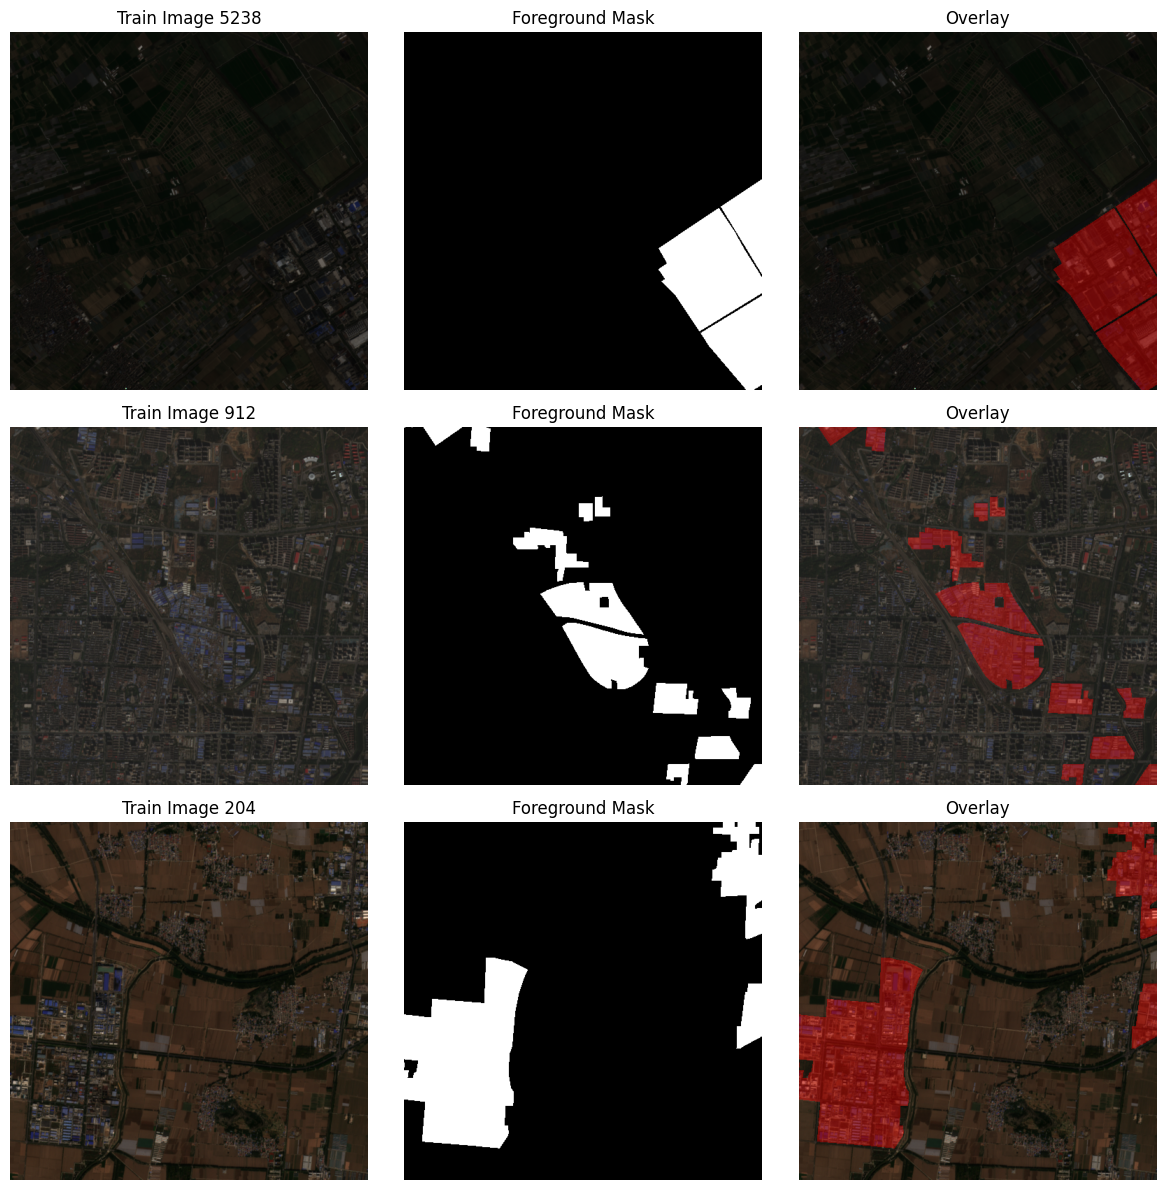

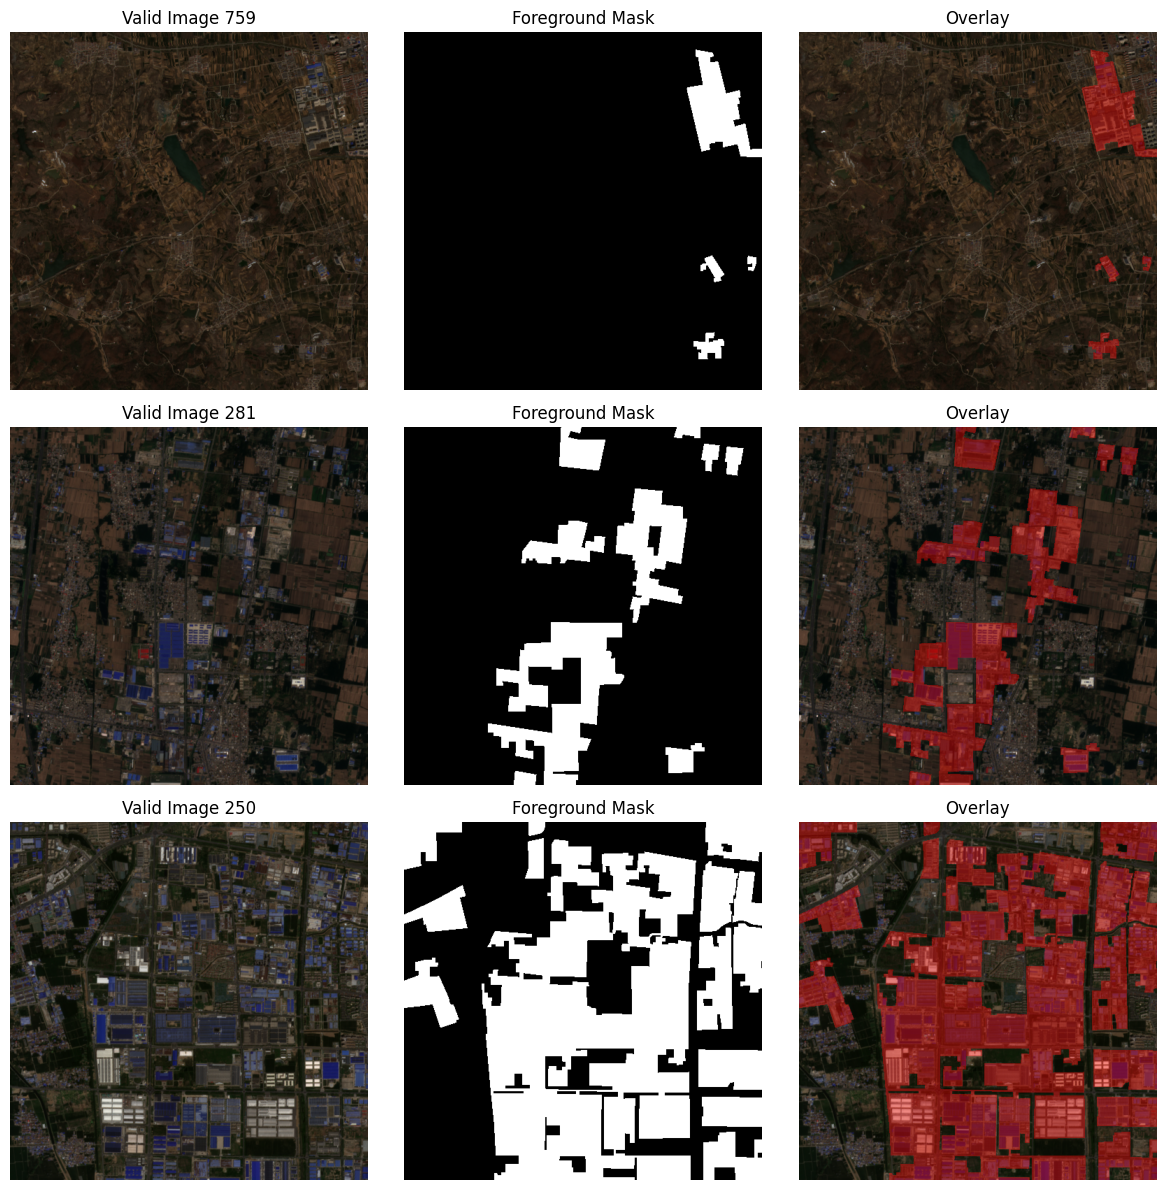

In [ ]:
import matplotlib.pyplot as plt
import random


def overlay_mask(image, mask, alpha=0.4, color=(1,0,0)):
    """
    image: (H,W,3) RGB
    mask:  (H,W) binary mask (0 or 1)
    alpha: 투명도
    color: 오버레이 색상 (R,G,B)
    """
    overlay = image.copy()
    overlay[mask > 0.5] = (1-alpha)*overlay[mask > 0.5] + alpha*np.array(color)
    return overlay


def visualize_overlay(X, Y, num_samples=3, set_name="Train"):
    idxs = random.sample(range(len(X)), num_samples)
    plt.figure(figsize=(12, num_samples*4))

    for i, idx in enumerate(idxs):
        img = X[idx]
        label = Y[idx][...,1]  # foreground 마스크만 가져옴 (class=1)

        # 원본
        plt.subplot(num_samples, 3, i*3+1)
        plt.imshow(img)
        plt.title(f"{set_name} Image {idx}")
        plt.axis("off")

        # 마스크
        plt.subplot(num_samples, 3, i*3+2)
        plt.imshow(label, cmap="gray")
        plt.title("Foreground Mask")
        plt.axis("off")

        # 오버레이
        overlayed = overlay_mask(img, label)
        plt.subplot(num_samples, 3, i*3+3)
        plt.imshow(overlayed)
        plt.title("Overlay")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


# 학습 데이터 오버레이 시각화
visualize_overlay(X_train, Y_train, num_samples=3, set_name="Train")

# 검증 데이터 오버레이 시각화
visualize_overlay(X_test, Y_test, num_samples=3, set_name="Valid")

## 3. Define Model

- 모델 정의
- 모델 구조: U-net

In [17]:
import tensorflow as tf

# module : conv2D -> BN -> Activation 
# Encoder -> Bottleneck(1024) -> Decoder

inputs = tf.keras.layers.Input((512, 512, 3))

#encoder
out = tf.keras.layers.Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(inputs)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.Activation('relu')(out)

out = tf.keras.layers.Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(out)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.Activation('relu')(out)
out1 = out
out = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(out)

out = tf.keras.layers.Conv2D(128, 3, padding='same', kernel_initializer='he_normal')(out)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.Activation('relu')(out)

out = tf.keras.layers.Conv2D(128, 3, padding='same', kernel_initializer='he_normal')(out)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.Activation('relu')(out)
out2 = out
out = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(out)

out = tf.keras.layers.Conv2D(256, 3, padding='same', kernel_initializer='he_normal')(out)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.Activation('relu')(out)

out = tf.keras.layers.Conv2D(256, 3, padding='same', kernel_initializer='he_normal')(out)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.Activation('relu')(out)
out3 = out
out = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(out)

out = tf.keras.layers.Conv2D(512, 3, padding='same', kernel_initializer='he_normal')(out)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.Activation('relu')(out)

out = tf.keras.layers.Conv2D(512, 3, padding='same', kernel_initializer='he_normal')(out)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.Activation('relu')(out)
out4 = out
out = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(out)


# bottleneck
out = tf.keras.layers.Conv2D(1024, 3, padding='same', kernel_initializer='he_normal')(out)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.Activation('relu')(out)

out = tf.keras.layers.Conv2D(1024, 3, padding='same', kernel_initializer='he_normal')(out)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.Activation('relu')(out)


#decoder
out = tf.keras.layers.UpSampling2D(interpolation='bilinear')(out)
out = tf.keras.layers.Concatenate()([out, out4])

out = tf.keras.layers.Conv2D(512, 3, padding='same', kernel_initializer='he_normal')(out)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.Activation('relu')(out)

out = tf.keras.layers.Conv2D(512, 3, padding='same', kernel_initializer='he_normal')(out)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.Activation('relu')(out)

out = tf.keras.layers.UpSampling2D(interpolation='bilinear')(out)
out = tf.keras.layers.Concatenate()([out, out3])

out = tf.keras.layers.Conv2D(256, 3, padding='same', kernel_initializer='he_normal')(out)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.Activation('relu')(out)

out = tf.keras.layers.Conv2D(256, 3, padding='same', kernel_initializer='he_normal')(out)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.Activation('relu')(out)

out = tf.keras.layers.UpSampling2D(interpolation='bilinear')(out)
out = tf.keras.layers.Concatenate()([out, out2])

out = tf.keras.layers.Conv2D(128, 3, padding='same', kernel_initializer='he_normal')(out)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.Activation('relu')(out)

out = tf.keras.layers.Conv2D(128, 3, padding='same', kernel_initializer='he_normal')(out)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.Activation('relu')(out)

out = tf.keras.layers.UpSampling2D(interpolation='bilinear')(out)
out = tf.keras.layers.Concatenate()([out, out1])

out = tf.keras.layers.Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(out)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.Activation('relu')(out)


out = tf.keras.layers.Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(out)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.Activation('relu')(out)


out = tf.keras.layers.Conv2D(2, 1, 1, activation='softmax', padding='same', kernel_initializer='he_normal')(out)

model = tf.keras.models.Model(inputs=inputs, outputs=out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

## 4. Train & Eval

- 학습 및 평가 진행

### 4.1. 모델 평가 메트릭 정의

In [18]:
import tensorflow as tf

class PrecisionScore(tf.keras.metrics.Metric):
    def __init__(self, name="precision", **kwargs):
        super().__init__(name=name, **kwargs)
        self.tp = self.add_weight(name="tp", initializer="zeros")
        self.fp = self.add_weight(name="fp", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        # one-hot → 정수 라벨
        y_true = tf.argmax(y_true, axis=-1)
        y_pred = tf.argmax(y_pred, axis=-1)

        y_true = tf.cast(y_true, tf.int32)
        y_pred = tf.cast(y_pred, tf.int32)

        tp = tf.reduce_sum(tf.cast((y_true == 1) & (y_pred == 1), tf.float32))
        fp = tf.reduce_sum(tf.cast((y_true == 0) & (y_pred == 1), tf.float32))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)

    def result(self):
        return self.tp / (self.tp + self.fp + 1e-7)

    def reset_states(self):
        self.tp.assign(0.0)
        self.fp.assign(0.0)


class RecallScore(tf.keras.metrics.Metric):
    def __init__(self, name="recall", **kwargs):
        super().__init__(name=name, **kwargs)
        self.tp = self.add_weight(name="tp", initializer="zeros")
        self.fn = self.add_weight(name="fn", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.argmax(y_true, axis=-1)
        y_pred = tf.argmax(y_pred, axis=-1)

        y_true = tf.cast(y_true, tf.int32)
        y_pred = tf.cast(y_pred, tf.int32)

        tp = tf.reduce_sum(tf.cast((y_true == 1) & (y_pred == 1), tf.float32))
        fn = tf.reduce_sum(tf.cast((y_true == 1) & (y_pred == 0), tf.float32))

        self.tp.assign_add(tp)
        self.fn.assign_add(fn)

    def result(self):
        return self.tp / (self.tp + self.fn + 1e-7)

    def reset_states(self):
        self.tp.assign(0.0)
        self.fn.assign(0.0)


class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name="f1_score", **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision_metric = PrecisionScore()
        self.recall_metric = RecallScore()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision_metric.update_state(y_true, y_pred, sample_weight)
        self.recall_metric.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision_metric.result()
        r = self.recall_metric.result()
        return 2 * ((p * r) / (p + r + 1e-7))

    def reset_states(self):
        self.precision_metric.reset_states()
        self.recall_metric.reset_states()


class MeanIoUCorrect(tf.keras.metrics.MeanIoU):
    def __init__(self, num_classes, name="miou", **kwargs):
        super().__init__(num_classes=num_classes, name=name, **kwargs)

    def update_state(self, y_true, y_pred, sample_weight=None):
        # 원핫 → 정수 라벨
        if y_true.shape[-1] == self.num_classes:
            y_true = tf.argmax(y_true, axis=-1)
        # softmax → 정수 예측
        if y_pred.shape[-1] == self.num_classes:
            y_pred = tf.argmax(y_pred, axis=-1)
        return super().update_state(y_true, y_pred, sample_weight)

### 4.2. 모델 학습

- A100 기준 배치 - 8
- 배치가 작아 학습이 매우 오래 걸리므로 80에폭만 진행
- Adam 옵티마이저 사용 + 러닝레이트 1e-3

In [19]:
# 모델 컴파일
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=[
        "accuracy",
        MeanIoUCorrect(num_classes=2),
        PrecisionScore(name="precision"),
        RecallScore(name="recall"),
        F1Score(name="f1_score")
    ]
)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import os
os.makedirs('./checkpoints', exist_ok=True)


# 모델 학습
history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=80,
    batch_size=8,
    shuffle=True,
    callbacks=[
        ModelCheckpoint(
            filepath="./checkpoints/best.keras",
            monitor="val_miou",
            mode="max",
            save_best_only=True,
            verbose=1
        ),
        ModelCheckpoint(
            filepath="./checkpoints/latest.keras",
            save_best_only=False,
            verbose=0
        )
    ]
)

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/80


2025-10-13 04:23:39.865697: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700
2025-10-13 04:23:41.534400: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1000/1000 [==============================] - ETA: 0s - loss: 0.2200 - accuracy: 0.9063 - miou: 0.7196 - precision: 0.7626 - recall: 0.6560 - f1_score: 0.7053

/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 5.4s



Epoch 1: val_miou improved from -inf to 0.74847, saving model to Unet-1024.h5
1000/1000 [==============================] - 519s 513ms/step - loss: 0.2200 - accuracy: 0.9063 - miou: 0.7196 - precision: 0.7626 - recall: 0.6560 - f1_score: 0.7053 - val_loss: 0.2298 - val_accuracy: 0.9142 - val_miou: 0.7485 - val_precision: 0.7636 - val_recall: 0.7295 - val_f1_score: 0.7462
Epoch 2/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.1673 - accuracy: 0.9296 - miou: 0.7841 - precision: 0.8147 - recall: 0.7614 - f1_score: 0.7872

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 5.6s



Epoch 2: val_miou did not improve from 0.74847
1000/1000 [==============================] - 486s 486ms/step - loss: 0.1673 - accuracy: 0.9296 - miou: 0.7841 - precision: 0.8147 - recall: 0.7614 - f1_score: 0.7872 - val_loss: 0.1960 - val_accuracy: 0.9092 - val_miou: 0.6980 - val_precision: 0.9247 - val_recall: 0.5166 - val_f1_score: 0.6628
Epoch 3/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.1451 - accuracy: 0.9393 - miou: 0.8108 - precision: 0.8395 - recall: 0.7974 - f1_score: 0.8179

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.3s



Epoch 3: val_miou improved from 0.74847 to 0.76914, saving model to Unet-1024.h5
1000/1000 [==============================] - 475s 475ms/step - loss: 0.1451 - accuracy: 0.9393 - miou: 0.8108 - precision: 0.8395 - recall: 0.7974 - f1_score: 0.8179 - val_loss: 0.1678 - val_accuracy: 0.9297 - val_miou: 0.7691 - val_precision: 0.9127 - val_recall: 0.6563 - val_f1_score: 0.7635
Epoch 4/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.1316 - accuracy: 0.9452 - miou: 0.8275 - precision: 0.8540 - recall: 0.8195 - f1_score: 0.8364

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.6s



Epoch 4: val_miou improved from 0.76914 to 0.82137, saving model to Unet-1024.h5
1000/1000 [==============================] - 467s 467ms/step - loss: 0.1316 - accuracy: 0.9452 - miou: 0.8275 - precision: 0.8540 - recall: 0.8195 - f1_score: 0.8364 - val_loss: 0.1421 - val_accuracy: 0.9412 - val_miou: 0.8214 - val_precision: 0.8244 - val_recall: 0.8386 - val_f1_score: 0.8314
Epoch 5/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.1197 - accuracy: 0.9502 - miou: 0.8423 - precision: 0.8641 - recall: 0.8410 - f1_score: 0.8524
Epoch 5: val_miou did not improve from 0.82137
1000/1000 [==============================] - 441s 441ms/step - loss: 0.1197 - accuracy: 0.9502 - miou: 0.8423 - precision: 0.8641 - recall: 0.8410 - f1_score: 0.8524 - val_loss: 0.1859 - val_accuracy: 0.9266 - val_miou: 0.7971 - val_precision: 0.7318 - val_recall: 0.9079 - val_f1_score: 0.8104
Epoch 6/80
1000/1000 [==============================] - ETA: 0s - loss: 0.1085 - accuracy: 0.9549 - miou: 0.8558 - precision: 0.8767 - recall: 0.8566 - f1_score: 0.8665

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 5.4s



Epoch 6: val_miou improved from 0.82137 to 0.82900, saving model to Unet-1024.h5
1000/1000 [==============================] - 467s 467ms/step - loss: 0.1085 - accuracy: 0.9549 - miou: 0.8558 - precision: 0.8767 - recall: 0.8566 - f1_score: 0.8665 - val_loss: 0.1316 - val_accuracy: 0.9471 - val_miou: 0.8290 - val_precision: 0.8964 - val_recall: 0.7844 - val_f1_score: 0.8367
Epoch 7/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.1038 - accuracy: 0.9571 - miou: 0.8625 - precision: 0.8824 - recall: 0.8645 - f1_score: 0.8734

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.2s



Epoch 7: val_miou improved from 0.82900 to 0.85222, saving model to Unet-1024.h5
1000/1000 [==============================] - 458s 458ms/step - loss: 0.1038 - accuracy: 0.9571 - miou: 0.8625 - precision: 0.8824 - recall: 0.8645 - f1_score: 0.8734 - val_loss: 0.1164 - val_accuracy: 0.9523 - val_miou: 0.8522 - val_precision: 0.8516 - val_recall: 0.8769 - val_f1_score: 0.8641
Epoch 8/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0919 - accuracy: 0.9622 - miou: 0.8774 - precision: 0.8960 - recall: 0.8811 - f1_score: 0.8885
Epoch 8: val_miou did not improve from 0.85222
1000/1000 [==============================] - 436s 436ms/step - loss: 0.0919 - accuracy: 0.9622 - miou: 0.8774 - precision: 0.8960 - recall: 0.8811 - f1_score: 0.8885 - val_loss: 0.1182 - val_accuracy: 0.9514 - val_miou: 0.8380 - val_precision: 0.9409 - val_recall: 0.7672 - val_f1_score: 0.8452
Epoch 9/80
1000/1000 [==============================] - ETA: 0s - loss: 0.0826 - accuracy: 0.9662 - miou: 0.8895 - precision: 0.9055 - recall: 0.8955 - f1_score: 0.9005

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.4s



Epoch 9: val_miou improved from 0.85222 to 0.87714, saving model to Unet-1024.h5
1000/1000 [==============================] - 459s 459ms/step - loss: 0.0826 - accuracy: 0.9662 - miou: 0.8895 - precision: 0.9055 - recall: 0.8955 - f1_score: 0.9005 - val_loss: 0.0940 - val_accuracy: 0.9613 - val_miou: 0.8771 - val_precision: 0.8825 - val_recall: 0.8954 - val_f1_score: 0.8889
Epoch 10/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0756 - accuracy: 0.9692 - miou: 0.8988 - precision: 0.9131 - recall: 0.9060 - f1_score: 0.9095
Epoch 10: val_miou did not improve from 0.87714
1000/1000 [==============================] - 435s 435ms/step - loss: 0.0756 - accuracy: 0.9692 - miou: 0.8988 - precision: 0.9131 - recall: 0.9060 - f1_score: 0.9095 - val_loss: 0.1001 - val_accuracy: 0.9589 - val_miou: 0.8609 - val_precision: 0.9624 - val_recall: 0.7933 - val_f1_score: 0.8697
Epoch 11/80
1000/1000 [==============================] - ETA: 0s - loss: 0.0617 - accuracy: 0.9749 - miou: 0.9167 - precision: 0.9277 - recall: 0.9254 - f1_score: 0.9265
Epoch 11: val_miou improved from 0.87714 to 0.88313, saving model to Unet-1024.h5
1000/1000 [==============================] - 439s 439ms/step - loss: 0.0617 - accuracy: 0.9749 - miou: 0.9167 - precision: 0.9277 - recall: 0.9254 - f1_score: 0.9265 - val_loss: 0.0951 - val_accuracy: 0.9649 - val_miou: 0.8831 - val_precision: 0.9

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.3s



Epoch 13: val_miou improved from 0.88313 to 0.89877, saving model to Unet-1024.h5
1000/1000 [==============================] - 458s 458ms/step - loss: 0.0484 - accuracy: 0.9803 - miou: 0.9340 - precision: 0.9421 - recall: 0.9430 - f1_score: 0.9426 - val_loss: 0.0799 - val_accuracy: 0.9701 - val_miou: 0.8988 - val_precision: 0.9631 - val_recall: 0.8601 - val_f1_score: 0.9087
Epoch 14/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0455 - accuracy: 0.9815 - miou: 0.9378 - precision: 0.9456 - recall: 0.9465 - f1_score: 0.9460

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.2s



Epoch 14: val_miou did not improve from 0.89877
1000/1000 [==============================] - 451s 451ms/step - loss: 0.0455 - accuracy: 0.9815 - miou: 0.9378 - precision: 0.9456 - recall: 0.9465 - f1_score: 0.9460 - val_loss: 0.0778 - val_accuracy: 0.9694 - val_miou: 0.8983 - val_precision: 0.9373 - val_recall: 0.8818 - val_f1_score: 0.9087
Epoch 15/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0375 - accuracy: 0.9847 - miou: 0.9480 - precision: 0.9543 - recall: 0.9563 - f1_score: 0.9553

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.2s



Epoch 15: val_miou improved from 0.89877 to 0.93147, saving model to Unet-1024.h5
1000/1000 [==============================] - 455s 455ms/step - loss: 0.0375 - accuracy: 0.9847 - miou: 0.9480 - precision: 0.9543 - recall: 0.9563 - f1_score: 0.9553 - val_loss: 0.0545 - val_accuracy: 0.9795 - val_miou: 0.9315 - val_precision: 0.9472 - val_recall: 0.9336 - val_f1_score: 0.9403
Epoch 16/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0357 - accuracy: 0.9854 - miou: 0.9505 - precision: 0.9567 - recall: 0.9582 - f1_score: 0.9574
Epoch 16: val_miou did not improve from 0.93147
1000/1000 [==============================] - 434s 434ms/step - loss: 0.0357 - accuracy: 0.9854 - miou: 0.9505 - precision: 0.9567 - recall: 0.9582 - f1_score: 0.9574 - val_loss: 0.0570 - val_accuracy: 0.9777 - val_miou: 0.9255 - val_precision: 0.9430 - val_recall: 0.9267 - val_f1_score: 0.9348
Epoch 17/80
1000/1000 [==============================] - ETA: 0s - loss: 0.0326 - accuracy: 0.9867 - miou: 0.9546 - precision: 0.9604 - recall: 0.9619 - f1_score: 0.9612

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 6.5s



Epoch 17: val_miou improved from 0.93147 to 0.94325, saving model to Unet-1024.h5
1000/1000 [==============================] - 459s 459ms/step - loss: 0.0326 - accuracy: 0.9867 - miou: 0.9546 - precision: 0.9604 - recall: 0.9619 - f1_score: 0.9612 - val_loss: 0.0448 - val_accuracy: 0.9831 - val_miou: 0.9433 - val_precision: 0.9485 - val_recall: 0.9537 - val_f1_score: 0.9511
Epoch 18/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0340 - accuracy: 0.9863 - miou: 0.9532 - precision: 0.9595 - recall: 0.9602 - f1_score: 0.9598

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.6s



Epoch 18: val_miou improved from 0.94325 to 0.94585, saving model to Unet-1024.h5
1000/1000 [==============================] - 456s 456ms/step - loss: 0.0340 - accuracy: 0.9863 - miou: 0.9532 - precision: 0.9595 - recall: 0.9602 - f1_score: 0.9598 - val_loss: 0.0421 - val_accuracy: 0.9839 - val_miou: 0.9458 - val_precision: 0.9529 - val_recall: 0.9540 - val_f1_score: 0.9534
Epoch 19/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0275 - accuracy: 0.9887 - miou: 0.9612 - precision: 0.9664 - recall: 0.9674 - f1_score: 0.9669

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.5s



Epoch 19: val_miou improved from 0.94585 to 0.95139, saving model to Unet-1024.h5
1000/1000 [==============================] - 457s 458ms/step - loss: 0.0275 - accuracy: 0.9887 - miou: 0.9612 - precision: 0.9664 - recall: 0.9674 - f1_score: 0.9669 - val_loss: 0.0379 - val_accuracy: 0.9857 - val_miou: 0.9514 - val_precision: 0.9637 - val_recall: 0.9529 - val_f1_score: 0.9583
Epoch 20/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0244 - accuracy: 0.9899 - miou: 0.9653 - precision: 0.9701 - recall: 0.9709 - f1_score: 0.9705
Epoch 20: val_miou did not improve from 0.95139
1000/1000 [==============================] - 433s 433ms/step - loss: 0.0244 - accuracy: 0.9899 - miou: 0.9653 - precision: 0.9701 - recall: 0.9709 - f1_score: 0.9705 - val_loss: 0.0401 - val_accuracy: 0.9852 - val_miou: 0.9499 - val_precision: 0.9571 - val_recall: 0.9570 - val_f1_score: 0.9570
Epoch 21/80
1000/1000 [==============================] - ETA: 0s - loss: 0.0235 - accuracy: 0.9903 - miou: 0.9666 - precision: 0.9714 - recall: 0.9719 - f1_score: 0.9717
Epoch 21: val_miou did not improve from 0.95139
1000/1000 [==============================] - 434s 434ms/step - loss: 0.0235 - accuracy: 0.9903 - miou: 0.9666 - precision: 0.9714 - recall: 0.9719 - f1_score: 0.9717 - val_loss: 0.0544 - val_accuracy: 0.9802 - val_miou: 0.9351 - val_precision: 0.9259 - val_recall: 0.9627 - val_f1_

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.2s



Epoch 22: val_miou improved from 0.95139 to 0.95374, saving model to Unet-1024.h5
1000/1000 [==============================] - 457s 457ms/step - loss: 0.0296 - accuracy: 0.9880 - miou: 0.9590 - precision: 0.9654 - recall: 0.9645 - f1_score: 0.9650 - val_loss: 0.0368 - val_accuracy: 0.9864 - val_miou: 0.9537 - val_precision: 0.9702 - val_recall: 0.9507 - val_f1_score: 0.9603
Epoch 23/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0195 - accuracy: 0.9919 - miou: 0.9720 - precision: 0.9761 - recall: 0.9765 - f1_score: 0.9763

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.2s



Epoch 23: val_miou improved from 0.95374 to 0.96018, saving model to Unet-1024.h5
1000/1000 [==============================] - 460s 460ms/step - loss: 0.0195 - accuracy: 0.9919 - miou: 0.9720 - precision: 0.9761 - recall: 0.9765 - f1_score: 0.9763 - val_loss: 0.0332 - val_accuracy: 0.9882 - val_miou: 0.9602 - val_precision: 0.9624 - val_recall: 0.9699 - val_f1_score: 0.9661
Epoch 24/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0188 - accuracy: 0.9922 - miou: 0.9729 - precision: 0.9770 - recall: 0.9772 - f1_score: 0.9771
Epoch 24: val_miou did not improve from 0.96018
1000/1000 [==============================] - 437s 437ms/step - loss: 0.0188 - accuracy: 0.9922 - miou: 0.9729 - precision: 0.9770 - recall: 0.9772 - f1_score: 0.9771 - val_loss: 0.0872 - val_accuracy: 0.9726 - val_miou: 0.9118 - val_precision: 0.9014 - val_recall: 0.9448 - val_f1_score: 0.9226
Epoch 25/80
1000/1000 [==============================] - ETA: 0s - loss: 0.0231 - accuracy: 0.9905 - miou: 0.9674 - precision: 0.9725 - recall: 0.9722 - f1_score: 0.9723
Epoch 25: val_miou did not improve from 0.96018
1000/1000 [==============================] - 435s 435ms/step - loss: 0.0231 - accuracy: 0.9905 - miou: 0.9674 - precision: 0.9725 - recall: 0.9722 - f1_score: 0.9723 - val_loss: 0.0343 - val_accuracy: 0.9883 - val_miou: 0.9599 - val_precision: 0.9712 - val_recall: 0.9605 - val_f1_

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.7s



Epoch 29: val_miou improved from 0.96132 to 0.96555, saving model to Unet-1024.h5
1000/1000 [==============================] - 460s 460ms/step - loss: 0.0195 - accuracy: 0.9920 - miou: 0.9724 - precision: 0.9771 - recall: 0.9762 - f1_score: 0.9767 - val_loss: 0.0285 - val_accuracy: 0.9899 - val_miou: 0.9655 - val_precision: 0.9717 - val_recall: 0.9699 - val_f1_score: 0.9708
Epoch 30/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9944 - miou: 0.9804 - precision: 0.9835 - recall: 0.9835 - f1_score: 0.9835
Epoch 30: val_miou did not improve from 0.96555
1000/1000 [==============================] - 432s 432ms/step - loss: 0.0135 - accuracy: 0.9944 - miou: 0.9804 - precision: 0.9835 - recall: 0.9835 - f1_score: 0.9835 - val_loss: 0.0344 - val_accuracy: 0.9886 - val_miou: 0.9612 - val_precision: 0.9654 - val_recall: 0.9685 - val_f1_score: 0.9670
Epoch 31/80
1000/1000 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 0.9948 - miou: 0.9817 - precision: 0.9847 - recall: 0.9846 - f1_score: 0.9847

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.2s



Epoch 31: val_miou improved from 0.96555 to 0.97018, saving model to Unet-1024.h5
1000/1000 [==============================] - 463s 463ms/step - loss: 0.0125 - accuracy: 0.9948 - miou: 0.9817 - precision: 0.9847 - recall: 0.9846 - f1_score: 0.9847 - val_loss: 0.0275 - val_accuracy: 0.9913 - val_miou: 0.9702 - val_precision: 0.9718 - val_recall: 0.9778 - val_f1_score: 0.9748
Epoch 32/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 0.9950 - miou: 0.9824 - precision: 0.9853 - recall: 0.9852 - f1_score: 0.9853

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.4s



Epoch 32: val_miou improved from 0.97018 to 0.97019, saving model to Unet-1024.h5
1000/1000 [==============================] - 463s 463ms/step - loss: 0.0121 - accuracy: 0.9950 - miou: 0.9824 - precision: 0.9853 - recall: 0.9852 - f1_score: 0.9853 - val_loss: 0.0266 - val_accuracy: 0.9913 - val_miou: 0.9702 - val_precision: 0.9717 - val_recall: 0.9780 - val_f1_score: 0.9748
Epoch 33/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0145 - accuracy: 0.9940 - miou: 0.9792 - precision: 0.9824 - recall: 0.9825 - f1_score: 0.9825
Epoch 33: val_miou did not improve from 0.97019
1000/1000 [==============================] - 434s 434ms/step - loss: 0.0145 - accuracy: 0.9940 - miou: 0.9792 - precision: 0.9824 - recall: 0.9825 - f1_score: 0.9825 - val_loss: 0.0307 - val_accuracy: 0.9898 - val_miou: 0.9653 - val_precision: 0.9687 - val_recall: 0.9724 - val_f1_score: 0.9706
Epoch 34/80
1000/1000 [==============================] - ETA: 0s - loss: 0.0180 - accuracy: 0.9927 - miou: 0.9747 - precision: 0.9788 - recall: 0.9784 - f1_score: 0.9786

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.2s



Epoch 34: val_miou improved from 0.97019 to 0.97036, saving model to Unet-1024.h5
1000/1000 [==============================] - 463s 463ms/step - loss: 0.0180 - accuracy: 0.9927 - miou: 0.9747 - precision: 0.9788 - recall: 0.9784 - f1_score: 0.9786 - val_loss: 0.0261 - val_accuracy: 0.9913 - val_miou: 0.9704 - val_precision: 0.9714 - val_recall: 0.9785 - val_f1_score: 0.9750
Epoch 35/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0108 - accuracy: 0.9955 - miou: 0.9843 - precision: 0.9868 - recall: 0.9868 - f1_score: 0.9868

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.2s



Epoch 35: val_miou improved from 0.97036 to 0.97215, saving model to Unet-1024.h5
1000/1000 [==============================] - 459s 459ms/step - loss: 0.0108 - accuracy: 0.9955 - miou: 0.9843 - precision: 0.9868 - recall: 0.9868 - f1_score: 0.9868 - val_loss: 0.0250 - val_accuracy: 0.9919 - val_miou: 0.9721 - val_precision: 0.9814 - val_recall: 0.9716 - val_f1_score: 0.9765
Epoch 36/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0100 - accuracy: 0.9958 - miou: 0.9854 - precision: 0.9878 - recall: 0.9878 - f1_score: 0.9878
Epoch 36: val_miou did not improve from 0.97215
1000/1000 [==============================] - 434s 434ms/step - loss: 0.0100 - accuracy: 0.9958 - miou: 0.9854 - precision: 0.9878 - recall: 0.9878 - f1_score: 0.9878 - val_loss: 0.0279 - val_accuracy: 0.9915 - val_miou: 0.9708 - val_precision: 0.9801 - val_recall: 0.9706 - val_f1_score: 0.9753
Epoch 37/80
1000/1000 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 0.9935 - miou: 0.9774 - precision: 0.9821 - recall: 0.9797 - f1_score: 0.9809
Epoch 37: val_miou did not improve from 0.97215
1000/1000 [==============================] - 437s 438ms/step - loss: 0.0165 - accuracy: 0.9935 - miou: 0.9774 - precision: 0.9821 - recall: 0.9797 - f1_score: 0.9809 - val_loss: 0.1180 - val_accuracy: 0.9631 - val_miou: 0.8760 - val_precision: 0.9503 - val_recall: 0.8295 - val_f1_

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.4s



Epoch 39: val_miou improved from 0.97215 to 0.97427, saving model to Unet-1024.h5
1000/1000 [==============================] - 461s 461ms/step - loss: 0.0095 - accuracy: 0.9960 - miou: 0.9862 - precision: 0.9885 - recall: 0.9884 - f1_score: 0.9884 - val_loss: 0.0246 - val_accuracy: 0.9925 - val_miou: 0.9743 - val_precision: 0.9792 - val_recall: 0.9774 - val_f1_score: 0.9783
Epoch 40/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 0.9964 - miou: 0.9873 - precision: 0.9894 - recall: 0.9894 - f1_score: 0.9894

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.2s



Epoch 40: val_miou improved from 0.97427 to 0.97526, saving model to Unet-1024.h5
1000/1000 [==============================] - 455s 455ms/step - loss: 0.0087 - accuracy: 0.9964 - miou: 0.9873 - precision: 0.9894 - recall: 0.9894 - f1_score: 0.9894 - val_loss: 0.0244 - val_accuracy: 0.9928 - val_miou: 0.9753 - val_precision: 0.9800 - val_recall: 0.9783 - val_f1_score: 0.9792
Epoch 41/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0085 - accuracy: 0.9964 - miou: 0.9876 - precision: 0.9896 - recall: 0.9896 - f1_score: 0.9896
Epoch 41: val_miou did not improve from 0.97526
1000/1000 [==============================] - 436s 436ms/step - loss: 0.0085 - accuracy: 0.9964 - miou: 0.9876 - precision: 0.9896 - recall: 0.9896 - f1_score: 0.9896 - val_loss: 0.0262 - val_accuracy: 0.9924 - val_miou: 0.9738 - val_precision: 0.9771 - val_recall: 0.9787 - val_f1_score: 0.9779
Epoch 42/80
1000/1000 [==============================] - ETA: 0s - loss: 0.0168 - accuracy: 0.9933 - miou: 0.9768 - precision: 0.9810 - recall: 0.9798 - f1_score: 0.9804
Epoch 42: val_miou did not improve from 0.97526
1000/1000 [==============================] - 437s 437ms/step - loss: 0.0168 - accuracy: 0.9933 - miou: 0.9768 - precision: 0.9810 - recall: 0.9798 - f1_score: 0.9804 - val_loss: 0.0307 - val_accuracy: 0.9891 - val_miou: 0.9627 - val_precision: 0.9745 - val_recall: 0.9621 - val_f1_

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.6s



Epoch 44: val_miou improved from 0.97526 to 0.97655, saving model to Unet-1024.h5
1000/1000 [==============================] - 460s 460ms/step - loss: 0.0079 - accuracy: 0.9967 - miou: 0.9885 - precision: 0.9904 - recall: 0.9904 - f1_score: 0.9904 - val_loss: 0.0235 - val_accuracy: 0.9932 - val_miou: 0.9766 - val_precision: 0.9812 - val_recall: 0.9793 - val_f1_score: 0.9803
Epoch 45/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0073 - accuracy: 0.9970 - miou: 0.9894 - precision: 0.9912 - recall: 0.9911 - f1_score: 0.9911

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.5s



Epoch 45: val_miou improved from 0.97655 to 0.97716, saving model to Unet-1024.h5
1000/1000 [==============================] - 457s 457ms/step - loss: 0.0073 - accuracy: 0.9970 - miou: 0.9894 - precision: 0.9912 - recall: 0.9911 - f1_score: 0.9911 - val_loss: 0.0227 - val_accuracy: 0.9934 - val_miou: 0.9772 - val_precision: 0.9801 - val_recall: 0.9814 - val_f1_score: 0.9808
Epoch 46/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0124 - accuracy: 0.9950 - miou: 0.9826 - precision: 0.9856 - recall: 0.9852 - f1_score: 0.9854
Epoch 46: val_miou did not improve from 0.97716
1000/1000 [==============================] - 438s 438ms/step - loss: 0.0124 - accuracy: 0.9950 - miou: 0.9826 - precision: 0.9856 - recall: 0.9852 - f1_score: 0.9854 - val_loss: 0.0237 - val_accuracy: 0.9924 - val_miou: 0.9739 - val_precision: 0.9821 - val_recall: 0.9740 - val_f1_score: 0.9780
Epoch 47/80
1000/1000 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 0.9967 - miou: 0.9885 - precision: 0.9904 - recall: 0.9903 - f1_score: 0.9904
Epoch 47: val_miou did not improve from 0.97716
1000/1000 [==============================] - 432s 432ms/step - loss: 0.0081 - accuracy: 0.9967 - miou: 0.9885 - precision: 0.9904 - recall: 0.9903 - f1_score: 0.9904 - val_loss: 0.0229 - val_accuracy: 0.9931 - val_miou: 0.9763 - val_precision: 0.9801 - val_recall: 0.9800 - val_f1_

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.4s



Epoch 51: val_miou did not improve from 0.97785
1000/1000 [==============================] - 452s 452ms/step - loss: 0.0078 - accuracy: 0.9968 - miou: 0.9889 - precision: 0.9907 - recall: 0.9907 - f1_score: 0.9907 - val_loss: 0.0226 - val_accuracy: 0.9934 - val_miou: 0.9772 - val_precision: 0.9828 - val_recall: 0.9789 - val_f1_score: 0.9808
Epoch 52/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 0.9967 - miou: 0.9884 - precision: 0.9904 - recall: 0.9903 - f1_score: 0.9903

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 4.7s



Epoch 52: val_miou did not improve from 0.97785
1000/1000 [==============================] - 455s 455ms/step - loss: 0.0081 - accuracy: 0.9967 - miou: 0.9884 - precision: 0.9904 - recall: 0.9903 - f1_score: 0.9903 - val_loss: 0.0226 - val_accuracy: 0.9933 - val_miou: 0.9770 - val_precision: 0.9785 - val_recall: 0.9828 - val_f1_score: 0.9807
Epoch 53/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0063 - accuracy: 0.9974 - miou: 0.9909 - precision: 0.9924 - recall: 0.9923 - f1_score: 0.9924

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 8.6s



Epoch 53: val_miou improved from 0.97785 to 0.97803, saving model to Unet-1024.h5
1000/1000 [==============================] - 467s 467ms/step - loss: 0.0063 - accuracy: 0.9974 - miou: 0.9909 - precision: 0.9924 - recall: 0.9923 - f1_score: 0.9924 - val_loss: 0.0224 - val_accuracy: 0.9936 - val_miou: 0.9780 - val_precision: 0.9844 - val_recall: 0.9786 - val_f1_score: 0.9815
Epoch 54/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 0.9969 - miou: 0.9892 - precision: 0.9909 - recall: 0.9910 - f1_score: 0.9910
Epoch 54: val_miou did not improve from 0.97803
1000/1000 [==============================] - 435s 435ms/step - loss: 0.0076 - accuracy: 0.9969 - miou: 0.9892 - precision: 0.9909 - recall: 0.9910 - f1_score: 0.9910 - val_loss: 0.0263 - val_accuracy: 0.9915 - val_miou: 0.9709 - val_precision: 0.9769 - val_recall: 0.9739 - val_f1_score: 0.9754
Epoch 55/80
1000/1000 [==============================] - ETA: 0s - loss: 0.0073 - accuracy: 0.9970 - miou: 0.9896 - precision: 0.9913 - recall: 0.9913 - f1_score: 0.9913
Epoch 55: val_miou did not improve from 0.97803
1000/1000 [==============================] - 436s 436ms/step - loss: 0.0073 - accuracy: 0.9970 - miou: 0.9896 - precision: 0.9913 - recall: 0.9913 - f1_score: 0.9913 - val_loss: 0.0226 - val_accuracy: 0.9936 - val_miou: 0.9778 - val_precision: 0.9818 - val_recall: 0.9809 - val_f1_

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 15.1s



Epoch 56: val_miou improved from 0.97803 to 0.97974, saving model to Unet-1024.h5
1000/1000 [==============================] - 480s 480ms/step - loss: 0.0057 - accuracy: 0.9977 - miou: 0.9918 - precision: 0.9932 - recall: 0.9931 - f1_score: 0.9931 - val_loss: 0.0217 - val_accuracy: 0.9941 - val_miou: 0.9797 - val_precision: 0.9846 - val_recall: 0.9814 - val_f1_score: 0.9830
Epoch 57/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0062 - accuracy: 0.9974 - miou: 0.9910 - precision: 0.9925 - recall: 0.9925 - f1_score: 0.9925
Epoch 57: val_miou did not improve from 0.97974
1000/1000 [==============================] - 439s 439ms/step - loss: 0.0062 - accuracy: 0.9974 - miou: 0.9910 - precision: 0.9925 - recall: 0.9925 - f1_score: 0.9925 - val_loss: 0.0266 - val_accuracy: 0.9916 - val_miou: 0.9711 - val_precision: 0.9814 - val_recall: 0.9698 - val_f1_score: 0.9756
Epoch 58/80
1000/1000 [==============================] - ETA: 0s - loss: 0.0063 - accuracy: 0.9974 - miou: 0.9909 - precision: 0.9925 - recall: 0.9924 - f1_score: 0.9924
Epoch 58: val_miou did not improve from 0.97974
1000/1000 [==============================] - 433s 433ms/step - loss: 0.0063 - accuracy: 0.9974 - miou: 0.9909 - precision: 0.9925 - recall: 0.9924 - f1_score: 0.9924 - val_loss: 0.0254 - val_accuracy: 0.9929 - val_miou: 0.9754 - val_precision: 0.9836 - val_recall: 0.9751 - val_f1_

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 8.0s



Epoch 64: val_miou did not improve from 0.98032
1000/1000 [==============================] - 457s 457ms/step - loss: 0.0135 - accuracy: 0.9950 - miou: 0.9825 - precision: 0.9858 - recall: 0.9848 - f1_score: 0.9853 - val_loss: 0.0215 - val_accuracy: 0.9938 - val_miou: 0.9786 - val_precision: 0.9834 - val_recall: 0.9807 - val_f1_score: 0.9820
Epoch 65/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.9978 - miou: 0.9922 - precision: 0.9935 - recall: 0.9936 - f1_score: 0.9935

INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets


INFO:tensorflow:Assets written to: /root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best/assets
wandb: Adding directory to artifact (/root/jupyter/K-ICT/wandb/run-20251013_042203-4dpkh69t/files/model-best)... Done. 6.5s



Epoch 65: val_miou did not improve from 0.98032
1000/1000 [==============================] - 465s 465ms/step - loss: 0.0054 - accuracy: 0.9978 - miou: 0.9922 - precision: 0.9935 - recall: 0.9936 - f1_score: 0.9935 - val_loss: 0.0212 - val_accuracy: 0.9942 - val_miou: 0.9799 - val_precision: 0.9843 - val_recall: 0.9819 - val_f1_score: 0.9831
Epoch 66/80


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric PrecisionScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric RecallScore implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1000/1000 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9982 - miou: 0.9935 - precision: 0.9946 - recall: 0.9946 - f1_score: 0.9946
Epoch 66: val_miou improved from 0.98032 to 0.98087, saving model to Unet-1024.h5
1000/1000 [==============================] - 441s 441ms/step - loss: 0.0045 - accuracy: 0.9982 - miou: 0.9935 - precision: 0.9946 - recall: 0.9946 - f1_score: 0.9946 - val_loss: 0.0222 - val_accuracy: 0.9944 - val_miou: 0.9809 - val_precision: 0.9819 - val_recall: 0.9861 - val_f1_score: 0.9840
Epoch 67/80
1000/1000 [==============================] - ETA: 0s - loss: 0.0047 - accuracy: 0.9981 - miou: 0.9933 - precision: 0.9944 - recall: 0.9944 - f1_score: 0.9944
Epoch 67: val_miou did not improve from 0.98087
1000/1000 [==============================] - 434s 434ms/step - loss: 0.0047 - accuracy: 0.9981 - miou: 0.9933 - precision: 0.9944 - recall: 0.9944 - f1_score: 0.9944 - val_loss: 0.0420 - val_accuracy: 0.9886 - val_miou: 0.9615 - val_precision: 0.9

In [21]:
# 학습 완료된 모델 저장
import os
os.makedirs("./results", exist_ok=True)
model.save_weights("./results/UNet-1024.weights.h5")
model.save("./results/UNet-1024.keras")

### 4.3. 모델 평가 및 테스트

In [22]:
from glob import glob
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import rasterio

In [23]:
# =====================
# 1. 저장된 모델 로드
# =====================
model = tf.keras.models.load_model(
    "./results/UNet-1024.keras", 
    custom_objects={
        "MeanIoUCorrect": MeanIoUCorrect,
        "PrecisionScore": PrecisionScore,
        "RecallScore": RecallScore,
        "F1Score": F1Score
    }
)

In [24]:
# =====================
# 2. 평가
# =====================
X_test, Y_test = load_set("./dataset/valid_SN/images/*.tif", "./dataset/valid_SN/labels/*.tif", resize=(512,512))
results = model.evaluate(X_test, Y_test, batch_size=16, verbose=1)
print("Evaluation Results:")
for name, val in zip(model.metrics_names, results):
    print(f"{name}: {val}")

  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
  m.reset_state()
  m.reset_state()
  m.reset_state()


63/63 [==============================] - 1218s 19s/step - loss: 0.0225 - accuracy: 0.9949 - miou: 0.9823 - precision: 0.9863 - recall: 0.9841 - f1_score: 0.9852
Evaluation Results:
loss: 0.02247565984725952
accuracy: 0.9948843121528625
miou: 0.9823168516159058
precision: 0.9862861633300781
recall: 0.9840814471244812
f1_score: 0.9851825833320618


In [25]:
# =====================
# 3. 예측
# =====================
preds = model.predict(X_test, batch_size=16, verbose=1)

# softmax → argmax (정수 클래스 맵으로 변환)
preds_classes = np.argmax(preds, axis=-1)
true_classes  = np.argmax(Y_test, axis=-1)

63/63 [==============================] - 1228s 19s/step


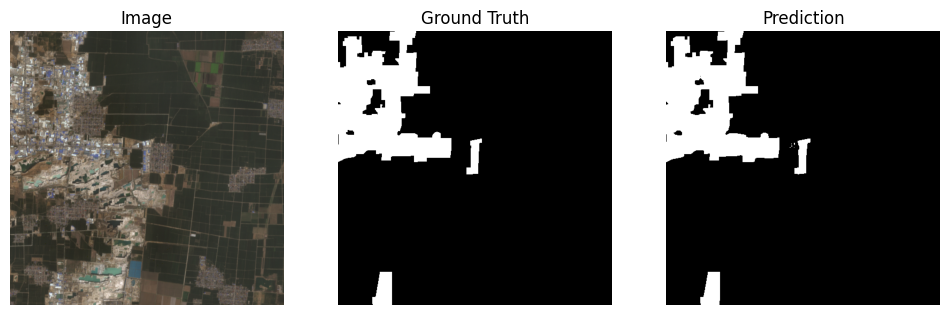

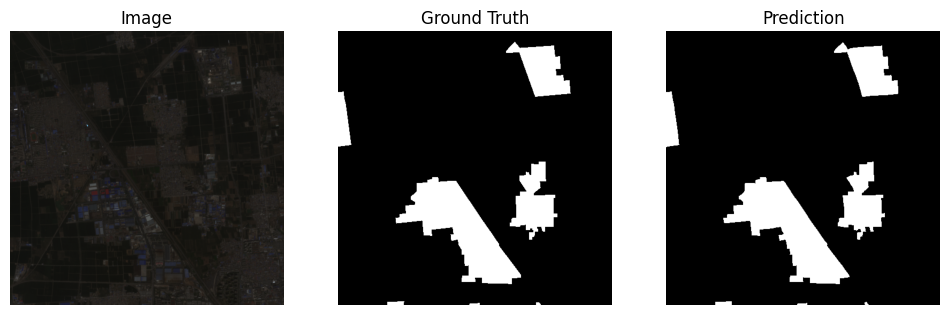

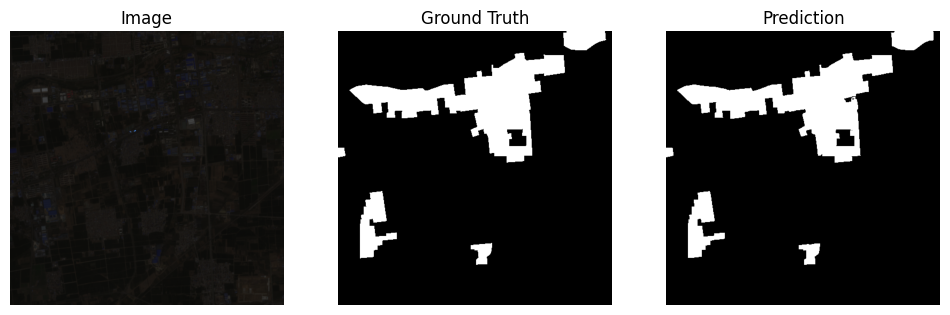

In [26]:
# =====================
# 4. 시각화 (앞의 3개 샘플만)
# =====================
for i in range(3):
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.imshow(X_test[i])
    plt.title("Image"); plt.axis("off")

    plt.subplot(1,3,2)
    plt.imshow(true_classes[i], cmap="gray")
    plt.title("Ground Truth"); plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(preds_classes[i], cmap="gray")
    plt.title("Prediction"); plt.axis("off")

    plt.show()